In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from importlib import reload
import functions as fun

reload(fun)

<module 'functions' from '/Users/leighannahooper/Desktop/flatiron/project/dsc-mod-1-project-v2-1-onl01-dtsc-ft-041320/functions.py'>

In [3]:
%store -r df_tm_movies
%store -r dfgenreIds

In [4]:
df_tm_movies.head()

,genre_ids,original_title,popularity,vote_average,vote_count,genre_new_list
id,,,,,,
12444,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788,"[12, 14, 10751]"
10191,"[14, 12, 16, 10751]",How to Train Your Dragon,28.734,7.7,7610,"[14, 12, 16, 10751]"
10138,"[12, 28, 878]",Iron Man 2,28.515,6.8,12368,"[12, 28, 878]"
862,"[16, 35, 10751]",Toy Story,28.005,7.9,10174,"[16, 35, 10751]"
27205,"[28, 878, 12]",Inception,27.920,8.3,22186,"[28, 878, 12]"


In [5]:
df_tm = df_tm_movies.drop(['genre_ids'], axis=1)
df_tmdb = df_tm.set_index('original_title').sort_values('original_title')

In [6]:
df_tmdb.head()

,popularity,vote_average,vote_count,genre_new_list
original_title,,,,
"""BLESSED""",0.600,7.0,1,"[99, 12]"
"""Legitimate Rape"" Pharmaceutical Ad",0.600,2.3,2,"[35, 80]"
"""cherry"" - Supreme",0.893,10.0,1,[99]
#1 Cheerleader Camp,3.277,3.6,34,"[35, 18]"
#ALLMYMOVIES,0.840,9.0,4,[99]


In [7]:
df_tmdb.rename(columns = {'genre_new_list' : 'genre_list'}, inplace = True)

In [11]:
df_tmdb.head()

,popularity,vote_average,vote_count,genre_list
original_title,,,,
"""BLESSED""",0.600,7.0,1,"[99, 12]"
"""Legitimate Rape"" Pharmaceutical Ad",0.600,2.3,2,"[35, 80]"
"""cherry"" - Supreme",0.893,10.0,1,[99]
#1 Cheerleader Camp,3.277,3.6,34,"[35, 18]"
#ALLMYMOVIES,0.840,9.0,4,[99]


In [12]:
df = df_tmdb

In [27]:
genres = df['genre_list'].apply(pd.Series)
# rename each variable
genres = genres.rename(columns = lambda x : 'genre_' + str(x + 1))
# view the new dataframe
genres

,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
original_title,,,,,,,
"""BLESSED""",99,12,NaN,NaN,NaN,NaN,NaN
"""Legitimate Rape"" Pharmaceutical Ad",35,80,NaN,NaN,NaN,NaN,NaN
"""cherry"" - Supreme",99,NaN,NaN,NaN,NaN,NaN,NaN
#1 Cheerleader Camp,35,18,NaN,NaN,NaN,NaN,NaN
#ALLMYMOVIES,99,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
하하하,35,18,10749,NaN,NaN,NaN,NaN
해양경찰 마르코,16,12,35,NaN,NaN,NaN,NaN
황산벌,36,10752,35,NaN,NaN,NaN,NaN


In [28]:
df_genres = pd.concat([df[:], genres[:]], axis=1)

In [29]:
df_genres.head()

,popularity,vote_average,vote_count,genre_list,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
original_title,,,,,,,,,,,
"""BLESSED""",0.600,7.0,1,"[99, 12]",99,12,NaN,NaN,NaN,NaN,NaN
"""Legitimate Rape"" Pharmaceutical Ad",0.600,2.3,2,"[35, 80]",35,80,NaN,NaN,NaN,NaN,NaN
"""cherry"" - Supreme",0.893,10.0,1,[99],99,NaN,NaN,NaN,NaN,NaN,NaN
#1 Cheerleader Camp,3.277,3.6,34,"[35, 18]",35,18,NaN,NaN,NaN,NaN,NaN
#ALLMYMOVIES,0.840,9.0,4,[99],99,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df = df_genres.drop(['genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'], axis=1)

In [31]:
# df = df_genres.reset_index()
df.reset_index(drop=True, inplace=True)

In [45]:
df_cleaning = df['genre_1'].value_counts().sort_values(ascending=False)

In [46]:
len(df_cleaning)

20

In [ ]:
# should we drop the NaN???

In [47]:
df_cleaning

18       4923
99       4407
35       3632
         2479
27       2209
28       1651
53       1533
16        917
10749     694
10402     678
878       572
12        545
80        538
10751     459
10770     365
14        317
9648      287
36        127
10752     103
37         81
Name: genre_1, dtype: int64

In [52]:
dftop_genres = df.loc[(df['genre_1']==18) | 
                               (df['genre_1']==99) | 
                               (df['genre_1']==35) |
                               (df['genre_1']==27) |
                               (df['genre_1']==28) |
                               (df['genre_1']==53) |
                               (df['genre_1']==16) |
                               (df['genre_1']==10749) |
                               (df['genre_1']==10402)]
                              

In [54]:
dftop_genres.head()

,popularity,vote_average,vote_count,genre_list,genre_1,genre_2


In [32]:
def popularity(n):
    popularity = 0
    for i in df.index:
        if any(n in x for x in df['genre_list'][i]):
            popularity += (df['popularity'][i])
    return(popularity)

In [33]:
popularity("12")

10579.915000000039

In [257]:
def count(n):
    count = 0
    for i in df.index:
        if any(n in x for x in df['genre_list'][i]):
            count += 1
    return(count)

In [258]:
count('12')

1326

In [188]:
def mean_pop(n):
    g_pop = popularity(n)
    g_num = count(n)
    mean = g_pop/g_num
    return mean

In [189]:
mean_pop("12")

7.557082142857171

In [195]:
df['genre_1'].notnull().value_counts()

True    26517
Name: genre_1, dtype: int64

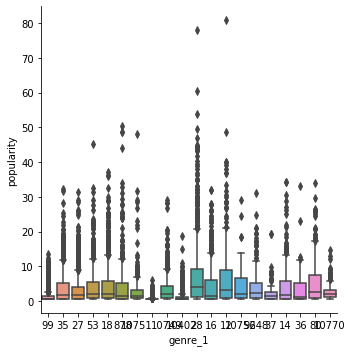

In [34]:
sns.catplot(x="genre_1", y="popularity", kind="box", data=df)

In [233]:
# sns.catplot(x="genre_1", y="popularity", hue='', kind="box", data=df)

In [263]:
# fig, ax = plt.subplots(figsize = (12,12))
# sns.violinplot(x="genre_1", y="popularity", data=df, ax=ax)

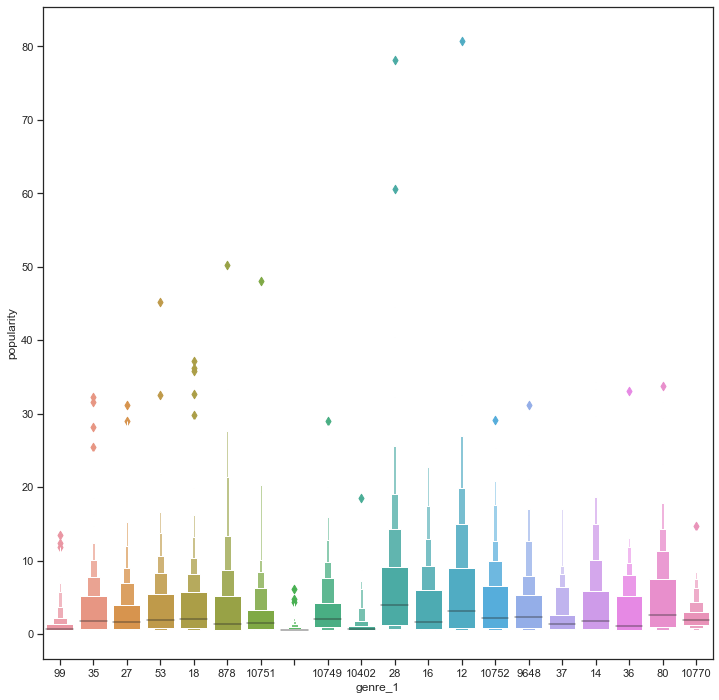

In [242]:
fig, ax = plt.subplots(figsize = (12,12))
sns.catplot(x='genre_1', y = 'popularity', kind = 'boxen', data = df, ax=ax)
plt.close(2)

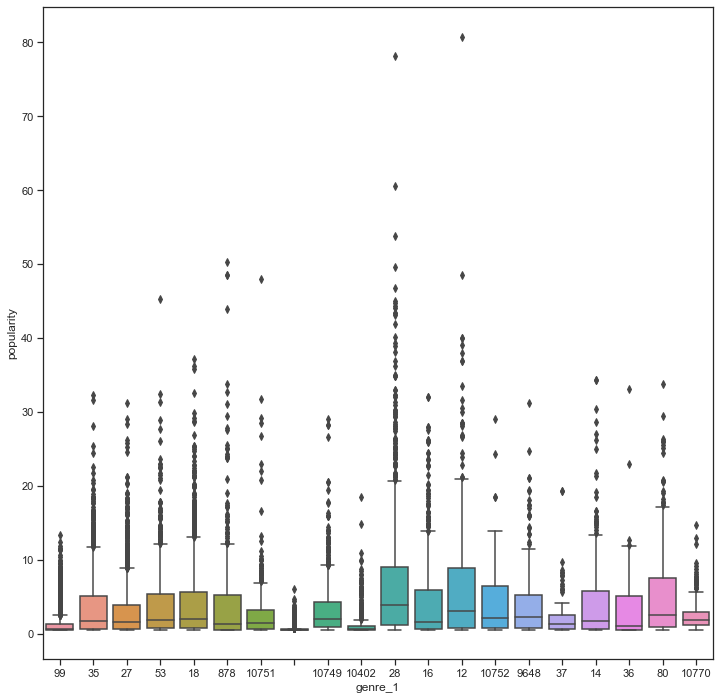

In [250]:
fig, ax = plt.subplots(figsize = (12,12))
# ax.set_ylim([0 ,0])
sns.catplot(x='genre_1', y = 'popularity', kind = 'box', data = df, ax=ax)
plt.close(2)